In [1]:
import numpy as np
import pandas as pd

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [51]:
file_path = r"C:\Users\Dattaraj\Desktop\ML\Dataset_Admission_Predict - Dataset_Admission_Predict.csv"
df = pd.read_csv(file_path)

In [55]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [59]:
df.shape[0]

400

In [61]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [63]:
# Drop unnecessary columns (if 'Serial No.' exists)
df.drop(columns=["Serial No."], errors='ignore', inplace=True)

In [65]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')


In [67]:
print(df.head())


   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65  


In [69]:
df["Admitted"] = (df["Chance of Admit"] >= 0.75).astype(int)
y = df["Admitted"]

In [71]:
print(df.shape)


(400, 9)


In [73]:
# Define features and target variable
X = df[["GRE Score", "CGPA"]]  # Selecting GRE and CGPA as per the problem statement
y = df["Admitted"]  # Target variable

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Standardization (optional for Decision Trees, but useful for other models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [97]:
# Train Decision Tree Model
clf = DecisionTreeClassifier(criterion="entropy",max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [99]:
# Predictions
y_pred = clf.predict(X_test)

In [101]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.89      0.94      0.91        33

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



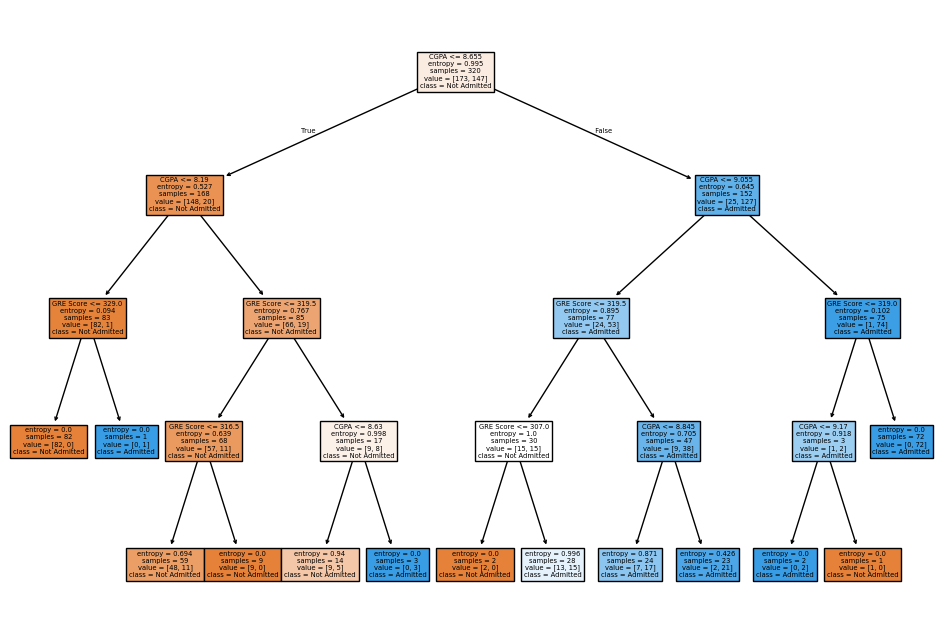

In [103]:
# Visualizing Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=["GRE Score", "CGPA"], class_names=["Not Admitted", "Admitted"], filled=True)
plt.show()